# Simple university example

Drawn from [this paper](http://www.wbs.ac.uk/downloads/working_papers/352.pdf) and augmented to allow correlation with environmental variables.

## Create the input data

Data is constructed as a `pandas` dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydea

%matplotlib inline

inputs = pd.DataFrame([[100, 70], [120, 123], [50, 20], [67, 17], [98, 20], [76, 12]], columns=['Teaching staff', 'Research staff'])
outputs = pd.DataFrame([[1540, 154, 59], [1408, 186, 23 ], [690, 59, 76], [674, 73, 90], [1686, 197, 12], [982, 63, 15]], columns=['Undergraduates', 'Masters', 'Publications'])
env_vars = pd.DataFrame([[  5.15262633e+00,   5.25431862e+03],
       [  8.62019738e+00,   1.10390901e+04],
       [  3.95821220e+00,   5.88356035e+03],
       [  9.21476691e+00,   1.54834181e+03],
       [  2.96674662e-01,   1.40433297e+04],
       [  1.41538397e+01,   3.75047428e+03]], columns=['Funding', 'City_size'])

In [2]:
inputs

,Teaching staff,Research staff
0,100,70
1,120,123
2,50,20
3,67,17
4,98,20
5,76,12


In [3]:
outputs

,Undergraduates,Masters,Publications
0,1540,154,59
1,1408,186,23
2,690,59,76
3,674,73,90
4,1686,197,12
5,982,63,15


In [4]:
env_vars

,Funding,City_size
0,5.152626,5254.31862
1,8.620197,11039.09010
2,3.958212,5883.56035
3,9.214767,1548.34181
4,0.296675,14043.32970
5,14.153840,3750.47428


## Build and solve the DEA object

In [5]:
uni_prob = pydea.DEAProblem(inputs, outputs, returns='CRS')

In [6]:
myresults = uni_prob.solve()

## Results

In [7]:
myresults['Status']

0    Optimal
1    Optimal
2    Optimal
3    Optimal
4    Optimal
5    Optimal
Name: Status, dtype: object

In [8]:
myresults['Efficiency']

0    0.961991
1    0.798801
2    1.000000
3    1.000000
4    1.000000
5    1.000000
Name: Efficiency, dtype: float64

In [9]:
myresults['Weights']

,in_Teaching staff,in_Research staff,out_Undergraduates,out_Masters,out_Publications
0,0.010000,0.000000,0.000571,0.000000,0.001392
1,0.008333,0.000000,0.000000,0.004001,0.002377
2,0.020000,0.000000,0.001143,0.000000,0.002783
3,0.000000,0.058824,0.000000,0.005570,0.006593
4,0.000000,0.050000,0.000499,0.000484,0.005317
5,0.000000,0.083333,0.000878,0.000000,0.009163


## Distribution of efficiency scores

Text(0.5, 1.0, 'Distribution of efficiency scores')

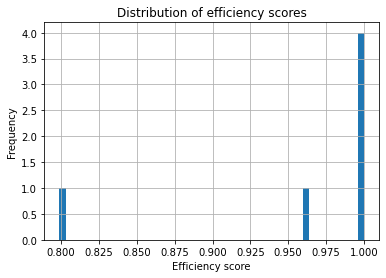

In [10]:
myresults['Efficiency'].hist(bins=50)
plt.ylabel('Frequency')
plt.xlabel('Efficiency score')
plt.title('Distribution of efficiency scores')

## Correlation with environment variables

In [11]:
myresults.env_corr(env_vars)

                            OLS Regression Results                            
Dep. Variable:             Efficiency   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.042
Date:                Mon, 09 Nov 2020   Prob (F-statistic):              0.453
Time:                        14:37:53   Log-Likelihood:                 8.7340
No. Observations:                   6   AIC:                            -11.47
Df Residuals:                       3   BIC:                            -12.09
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1259      0.122      9.217      0.0

/Users/jameszuccollo/miniconda3/envs/analysis/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
